In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [11]:
corre= df.drop(columns='Genre').corr()

<Axes: >

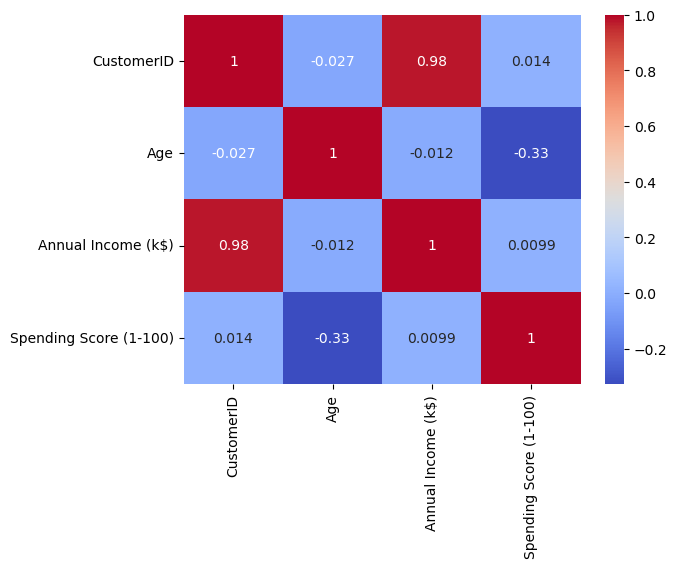

In [13]:
sns.heatmap(corre,annot=True,cmap='coolwarm')

In [17]:
X = df.iloc[:,[3,4]].values

In [20]:
X.shape

(200, 2)

## Elbow Function

In [25]:
from sklearn.cluster import KMeans

In [26]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    

C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak o

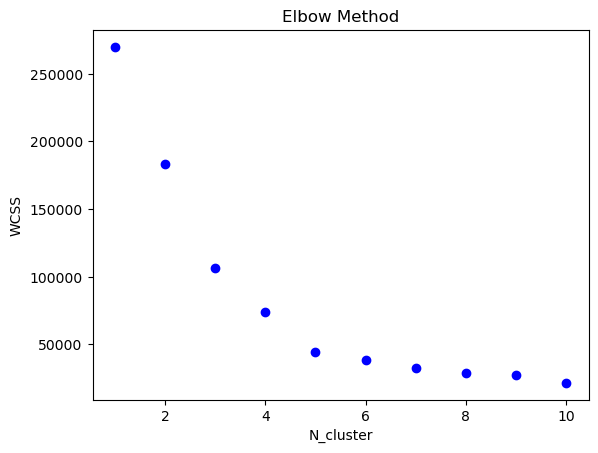

In [29]:
plt.plot(range(1,11),wcss,'bo')
plt.title("Elbow Method")
plt.xlabel("N_cluster")
plt.ylabel("WCSS")

plt.show()

## Training the ML Model

In [30]:
kmeans = KMeans(n_clusters=5,init='k-means++')
predicts = kmeans.fit_predict(X)

C:\ProgramData\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
predicts

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

## Visualizing clusters

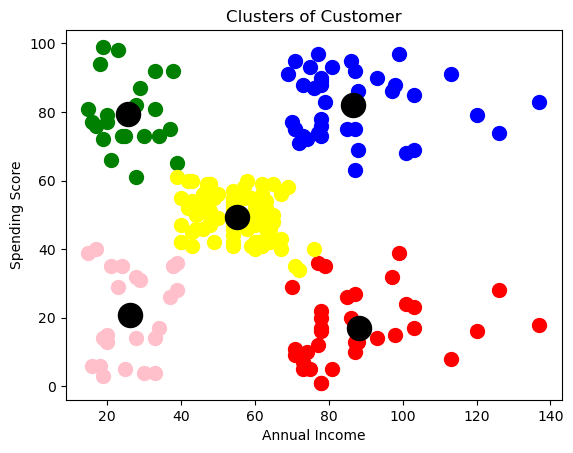

In [32]:
plt.scatter(X[predicts==0,0],X[predicts==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[predicts==1,0],X[predicts==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(X[predicts==2,0],X[predicts==2,1],s=100,c='yellow',label='Cluster 3')
plt.scatter(X[predicts==3,0],X[predicts==3,1],s=100,c='blue',label='Cluster 4')
plt.scatter(X[predicts==4,0],X[predicts==4,1],s=100,c='pink',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroid')
plt.title("Clusters of Customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

## Metrics

In [33]:
from sklearn.metrics import silhouette_score

In [35]:
score = silhouette_score(X, predicts)

In [34]:
score

NameError: name 'score' is not defined